In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#path = "/content/drive/My Drive/"
path = "/content/drive/My Drive/RSM 8521 (AI and Deep Learning)/TEAM 17/"

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train=pd.read_csv(path + 'train.csv')
#df_train = pd.read_csv('train.csv')
df_train.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
df_train=df_train.sample(50000, replace=False)
df_train.shape

(50000, 6)

In [6]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [8]:
sdf_train=df_train.dropna()
df_train.shape

(50000, 6)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 278124 to 283467
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [10]:
df_train.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [11]:
qids = pd.Series(df_train['qid1'].to_list() + df_train['qid2'].to_list())
num_unique_questions = len(np.unique(qids))
non_unique_questions = np.sum(qids.value_counts() > 1)
percentage_non_unique_questions = ( non_unique_questions / num_unique_questions ) * 100

print("Statistics on Question IDs:")
print(f"Number of Unique Questions: {num_unique_questions}")
print(f"Number of Non-Unique Questions: {non_unique_questions}")
print(f"Percentage of Non-Unique Questions: {percentage_non_unique_questions:.2f}%")
print(f"Maximum Times a Question Got Repeated: {qids.value_counts().iloc[0]}")

Statistics on Question IDs:
Number of Unique Questions: 88959
Number of Non-Unique Questions: 7346
Percentage of Non-Unique Questions: 8.26%
Maximum Times a Question Got Repeated: 22


In [12]:
pair_duplicates = df_train[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).count().reset_index()
num_duplicated_questions = pair_duplicates.shape[0] - df_train.shape[0]
print(f"Number of duplicated questions: {num_duplicated_questions}")

Number of duplicated questions: 0


In [13]:
df_train = df_train.fillna('')
df_train.head()

id    qid1    qid2  \
278124  278124   84905  221732   
128953  128953  207264  207265   
362277  362277  492183  108657   
168489  168489  260981  174200   
210828  210828  253876  134461   

                                                question1  \
278124           How can I increase my typing speed fast?   
128953  How should I joint the Indian navy after the c...   
362277               What are some good Desserts recipes?   
168489  What are the most inspirational books you ever...   
210828  What would be the salary of an assistant secti...   

                                                question2  is_duplicate  
278124     What is the best way to increase typing speed?             1  
128953  I'm a lean guy. Can I join Indian Navy as a me...             0  
362277                What are some good dessert recipes?             1  
168489  What is the most life changing book you've eve...             0  
210828  What is the present salary of section officer ...             1

## EDA Base Data

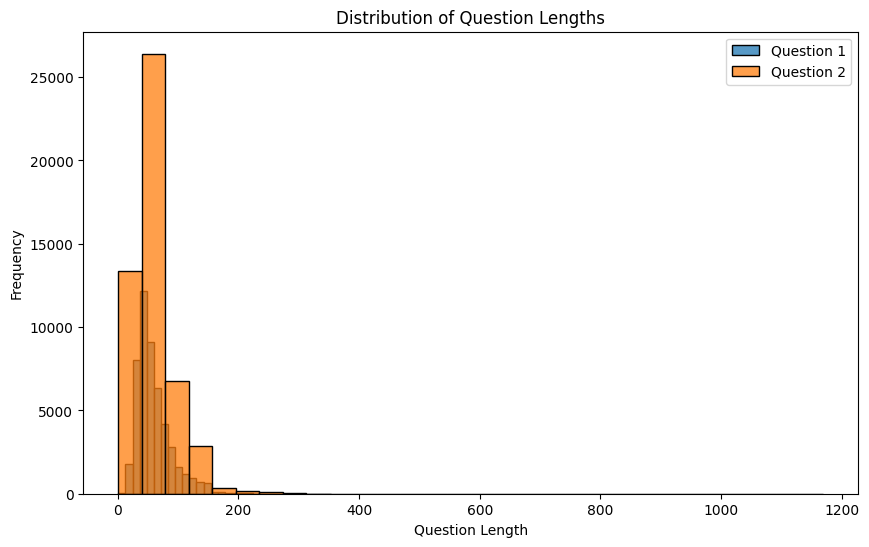

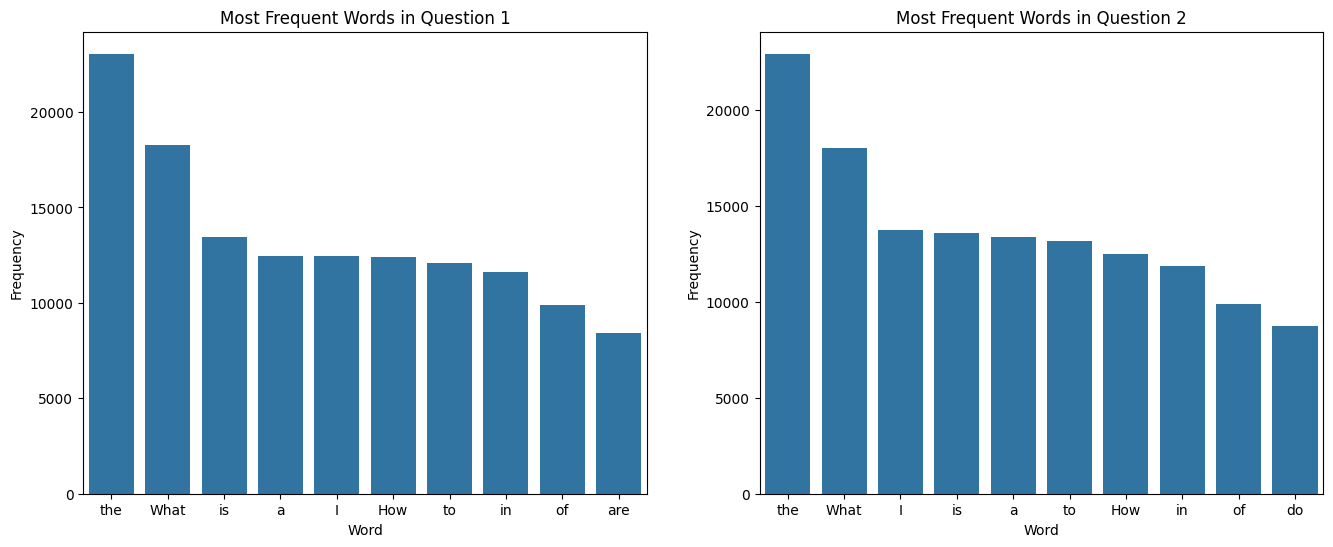

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of question lengths
df_train['q1_len'] = df_train['question1'].str.len()
df_train['q2_len'] = df_train['question2'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df_train['q1_len'], bins=30, label='Question 1')
sns.histplot(df_train['q2_len'], bins=30, label='Question 2')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')
plt.legend()
plt.show()

# Most frequent words in questions
from collections import Counter

q1_words = Counter(' '.join(df_train['question1']).split()).most_common(10)
q2_words = Counter(' '.join(df_train['question2']).split()).most_common(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=[word for word, count in q1_words], y=[count for word, count in q1_words], ax=axes[0])
axes[0].set_title('Most Frequent Words in Question 1')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Frequency')

sns.barplot(x=[word for word, count in q2_words], y=[count for word, count in q2_words], ax=axes[1])
axes[1].set_title('Most Frequent Words in Question 2')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')
plt.show()


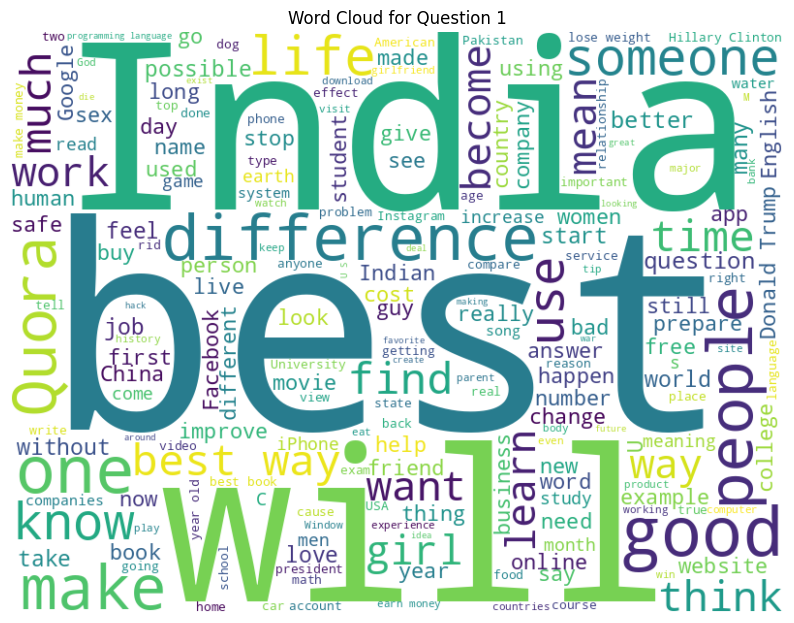

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df_train['question1'])
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Question 1')
plt.show()

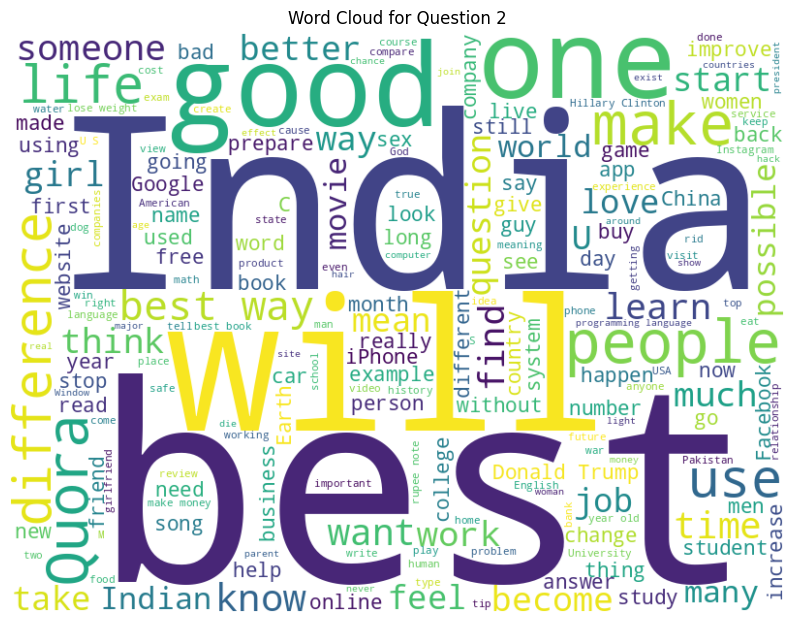

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df_train['question2'])
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Question 2')
plt.show()

In [17]:
df_clouded=df_train.copy()
df_clouded.head()

id    qid1    qid2  \
278124  278124   84905  221732   
128953  128953  207264  207265   
362277  362277  492183  108657   
168489  168489  260981  174200   
210828  210828  253876  134461   

                                                question1  \
278124           How can I increase my typing speed fast?   
128953  How should I joint the Indian navy after the c...   
362277               What are some good Desserts recipes?   
168489  What are the most inspirational books you ever...   
210828  What would be the salary of an assistant secti...   

                                                question2  is_duplicate  \
278124     What is the best way to increase typing speed?             1   
128953  I'm a lean guy. Can I join Indian Navy as a me...             0   
362277                What are some good dessert recipes?             1   
168489  What is the most life changing book you've eve...             0   
210828  What is the present salary of section officer ...             1   

        q1_len  q2_len  
278124      40      46  
128953      82      64  
362277      36      35  
168489      69      53  
210828      93      84

In [18]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# Download necessary NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization
    words = text.split()
    # Remove stopwords and stem
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Rejoin into a single string
    return ' '.join(words)

df_clouded['question1'] = df_clouded['question1'].apply(preprocess)
df_clouded['question2'] = df_clouded['question2'].apply(preprocess)
df_clouded.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


id    qid1    qid2  \
278124  278124   84905  221732   
128953  128953  207264  207265   
362277  362277  492183  108657   
168489  168489  260981  174200   
210828  210828  253876  134461   

                                                question1  \
278124                            increas type speed fast   
128953             joint indian navi complet engin mechan   
362277                                 good dessert recip   
168489                   inspir book ever read get inspir   
210828  would salari assist section offic css seventh ...   

                                                question2  is_duplicate  \
278124                        best way increas type speed             1   
128953             lean guy join indian navi mechan engin             0   
362277                                 good dessert recip             1   
168489                          life chang book ever read             0   
210828  present salari section offic work civil secret...             1   

        q1_len  q2_len  
278124      40      46  
128953      82      64  
362277      36      35  
168489      69      53  
210828      93      84

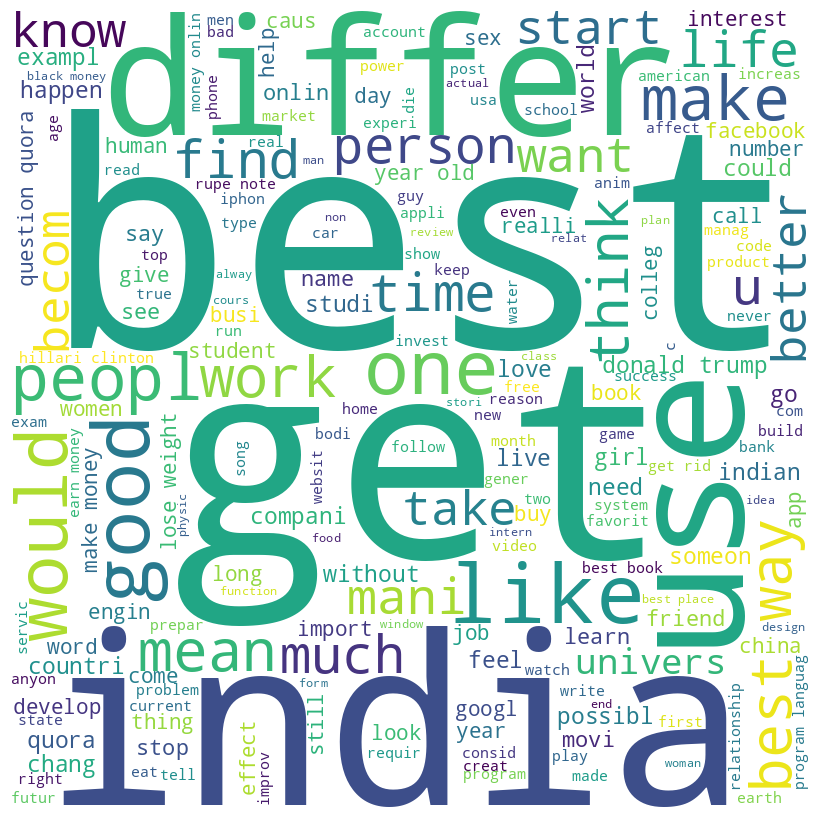

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all questions into a single text
text = ' '.join(df_clouded['question1'].values)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

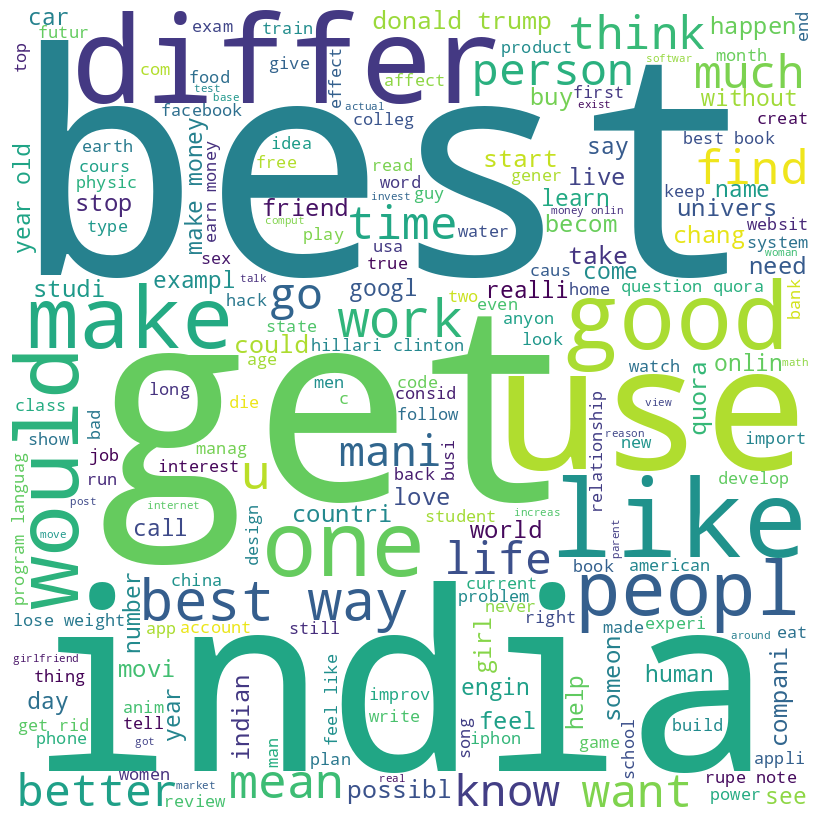

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all questions into a single text
text = ' '.join(df_clouded['question2'].values)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<Axes: xlabel='is_duplicate'>

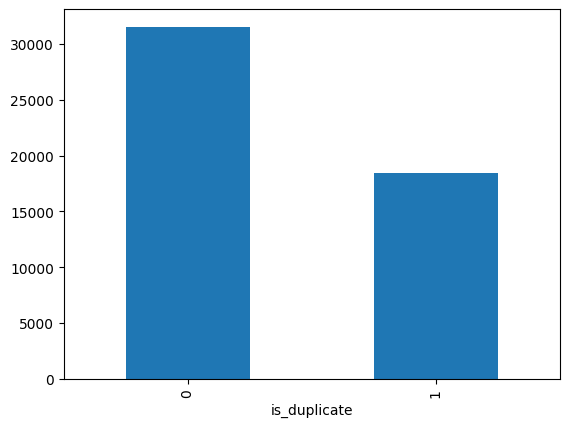

In [21]:
# Distribution of is_duplicated
df_train['is_duplicate'].value_counts().plot(kind = 'bar')

# The distribution is not balanced, we need to resmaple the original training set

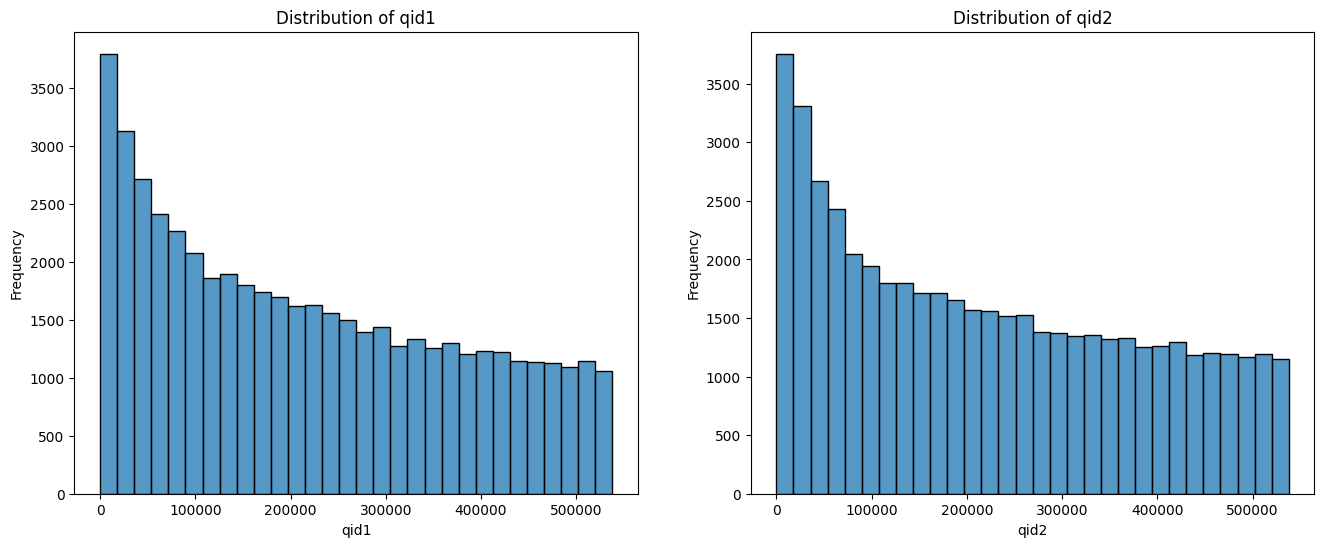

In [22]:
import matplotlib.pyplot as plt
# Distribution of qid1 and qid2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_train['qid1'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of qid1')
axes[0].set_xlabel('qid1')
axes[0].set_ylabel('Frequency')

sns.histplot(df_train['qid2'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of qid2')
axes[1].set_xlabel('qid2')
axes[1].set_ylabel('Frequency')
plt.show()

## Random Forest without Feature Engineering Base Model

In [23]:
only_questions=df_train[['question1','question2']]
only_questions.head()

question1  \
278124           How can I increase my typing speed fast?   
128953  How should I joint the Indian navy after the c...   
362277               What are some good Desserts recipes?   
168489  What are the most inspirational books you ever...   
210828  What would be the salary of an assistant secti...   

                                                question2  
278124     What is the best way to increase typing speed?  
128953  I'm a lean guy. Can I join Indian Navy as a me...  
362277                What are some good dessert recipes?  
168489  What is the most life changing book you've eve...  
210828  What is the present salary of section officer ...

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(only_questions['question1'])+list(only_questions['question2'])
cv=CountVectorizer(max_features=100)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [25]:
temp_df1=pd.DataFrame(q1_arr,index=only_questions.index)
temp_df2=pd.DataFrame(q2_arr,index=only_questions.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape, temp_df.head()

((50000, 200),
         0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  \
 278124   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
 128953   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
 362277   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
 168489   0   0   0   0   0   1   0   1   0   0  ...   0   0   0   0   0   0   
 210828   0   1   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   
 
         96  97  98  99  
 278124   0   0   0   0  
 128953   0   0   0   0  
 362277   0   0   0   0  
 168489   0   0   1   0  
 210828   0   0   0   0  
 
 [5 rows x 200 columns])

In [26]:
temp_df['is_duplicate']=df_train['is_duplicate']
temp_df.head()

0  1  2  3  4  5  6  7  8  9  ...  91  92  93  94  95  96  97  98  99  \
278124  0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
128953  0  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
362277  0  0  0  0  0  0  0  1  0  0  ...   0   0   0   0   0   0   0   0   0   
168489  0  0  0  0  0  1  0  1  0  0  ...   0   0   0   0   0   0   0   1   0   
210828  0  1  0  0  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   

        is_duplicate  
278124             1  
128953             0  
362277             1  
168489             0  
210828             1  

[5 rows x 201 columns]

In [27]:
from sklearn.model_selection import train_test_split
X=temp_df.iloc[:,0:-1].values
y=temp_df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=420)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_base=RandomForestClassifier(random_state=420)
rf_base.fit(X_train,y_train)
y_pred=rf_base.predict(X_test)
accuracy_score(y_test,y_pred)

0.7248

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[5346,  898],
       [1854, 1902]])

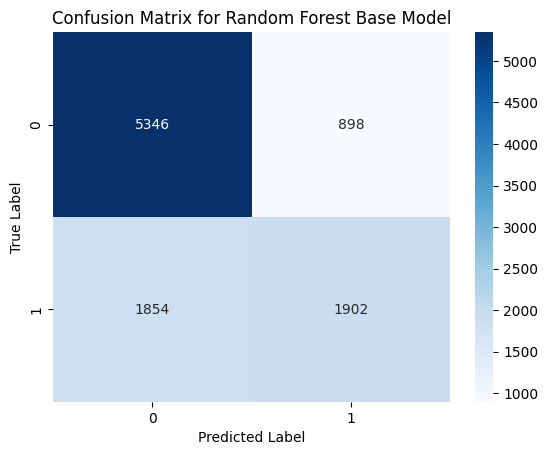

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix visualization.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Base Model")
plt.show()


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6332
           1       0.65      0.50      0.57      3668

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



## Random Forest Model with Feature Engineering

In [124]:
df_train1=df_train.copy()
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  
242370      54      43  
76524       80      31  
236661      38      24  
160378      64      48  
272094     137      88

In [125]:
#Length of question 1 and length of question 2 features
df_train1['q1len']=df_train1['question1'].str.len()
df_train1['q2len']=df_train1['question2'].str.len()
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  
242370      54      43     54     43  
76524       80      31     80     31  
236661      38      24     38     24  
160378      64      48     64     48  
272094     137      88    137     88

In [126]:
df_train1['q1_n_words']=df_train1['question1'].apply(lambda row: len(row.split(" ")))
df_train1['q2_n_words']=df_train1['question2'].apply(lambda row: len(row.split(" ")))
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  
242370      54      43     54     43          10           8  
76524       80      31     80     31          14           5  
236661      38      24     38     24           7           4  
160378      64      48     64     48           9           6  
272094     137      88    137     88          22          14

In [127]:
def normalized_word_Common(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return 1.0 * len(w1 & w2)

In [128]:
# Calculate the common words in two questions
df_train1['word_common'] = df_train1.apply(normalized_word_Common, axis=1)
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  
242370      54      43     54     43          10           8          6.0  
76524       80      31     80     31          14           5          0.0  
236661      38      24     38     24           7           4          0.0  
160378      64      48     64     48           9           6          5.0  
272094     137      88    137     88          22          14         12.0

In [129]:
lst_q1=df_train1['question1'].apply(lambda row: row.split(" ")).to_list()
lst_q2=df_train1['question2'].apply(lambda row: row.split(" ")).to_list()

In [130]:
#Comparing whether the question pairs share the same initial word (eg. q1: What is xxx; q2: What are xxx -> 1)
lst_first_word=[]
for i in range(0, df_train1.shape[0]):
  if lst_q1[i][0] == lst_q2[i][0]:
    lst_first_word.append(1)
  else:
    lst_first_word.append(0)
lst_first_word[:5]

[1, 0, 0, 1, 1]

In [131]:
df_train1['first_word_match'] = lst_first_word
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  
242370                 1  
76524                  0  
236661                 0  
160378                 1  
272094                 1

In [132]:
#calculates the total number of unique words in two questions after normalization
def normalized_word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return 1.0 * (len(w1) + len(w2))

In [133]:
df_train1['word_total'] = df_train1.apply(normalized_word_Total, axis=1)
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  
242370                 1        18.0  
76524                  0        18.0  
236661                 0        11.0  
160378                 1        15.0  
272094                 1        33.0

In [134]:
def normalized_word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [135]:
df_train1['word_share'] = df_train1.apply(normalized_word_share, axis=1)
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  word_share  
242370                 1        18.0    0.333333  
76524                  0        18.0    0.000000  
236661                 0        11.0    0.000000  
160378                 1        15.0    0.333333  
272094                 1        33.0    0.363636

In [136]:
# Counting the frequency of qid1 and qid2
df_train1['freq_qid1'] = df_train1.groupby('qid1')['qid1'].transform('count')
df_train1['freq_qid2'] = df_train1.groupby('qid2')['qid2'].transform('count')
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_qid1  freq_qid2  
242370                 1        18.0    0.333333          2          1  
76524                  0        18.0    0.000000          1          1  
236661                 0        11.0    0.000000          1          2  
160378                 1        15.0    0.333333          1          1  
272094                 1        33.0    0.363636          4          5

In [137]:
df_train1['freq_q1_q2']=df_train1['freq_qid1']+df_train1['freq_qid2']
df_train1['freq_q1_q2_sub']=abs(df_train1['freq_qid1']-df_train1['freq_qid2'])
df_train1.drop(['freq_qid1','freq_qid2'],axis=1,inplace=True)
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  
242370                 1        18.0    0.333333           3               1  
76524                  0        18.0    0.000000           2               0  
236661                 0        11.0    0.000000           3               1  
160378                 1        15.0    0.333333           2               0  
272094                 1        33.0    0.363636           9               1

In [138]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df_train2=df_train1.copy()

# def preprocess(text):
#     text = text.lower()  # lowercasing
#     text = re.sub(r'\W', ' ', text)  # remove non-alphanumeric characters
#     text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
#     return text

def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization
    words = text.split()
    # Remove stem
    words = [stemmer.stem(word) for word in words]
    # words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Rejoin into a single string
    return ' '.join(words)

df_train2['question1'] = df_train2['question1'].apply(preprocess)
df_train2['question2'] = df_train2['question2'].apply(preprocess)
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
# Concatenate questions to fit the vectorizer on all possible words
all_questions = pd.concat([df_train2['question1'], df_train2['question2']], axis=0)
vectorizer.fit(all_questions)

# Transform questions to TF-IDF vectors
q1_vectors = vectorizer.transform(df_train2['question1'])
q2_vectors = vectorizer.transform(df_train2['question2'])

# Compute cosine similarity
cosine_similarities = [cosine_similarity(q1_vectors[i], q2_vectors[i])[0][0] for i in range(q1_vectors.shape[0])]

# Add the cosine similarities to the dataframe
df_train2['cosine_similarity'] = cosine_similarities
df_train2.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370       how do i find client for my web develop busi   
76524   what do i need to know to success program a ne...   
236661               islam whi is pork forbidden in islam   
160378  what are the best over ear wireless nois cance...   
272094  what are the safeti precaut on handl shotgun p...   

                                                question2  is_duplicate  \
242370                 how can i grow my web develop busi             1   
76524                       how work samsung eyno chipset             0   
236661                             doe islam prohibit art             0   
160378             what are the best nois cancel headphon             0   
272094  what are the safeti precaut on handl shotgun p...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   

        cosine_similarity  
242370           0.606924  
76524            0.000000  
236661           0.361005  
160378           0.754521  
272094           0.673902

In [139]:
df_train1['cosine_similarity']=df_train2['cosine_similarity']
df_train1.head()

id    qid1    qid2  \
242370  242370  254566   50809   
76524    76524  130807  130808   
236661  236661   22431  347638   
160378  160378  250150  250151   
272094  272094   78416   21996   

                                                question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  \
242370        How can I grow my web development business?             1   
76524                     How work samsung eynos chipset?             0   
236661                           Does Islam prohibit art?             0   
160378   What are the best noise-cancellation headphones?             0   
272094  What are the safety precautions on handling sh...             1   

        q1_len  q2_len  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370      54      43     54     43          10           8          6.0   
76524       80      31     80     31          14           5          0.0   
236661      38      24     38     24           7           4          0.0   
160378      64      48     64     48           9           6          5.0   
272094     137      88    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   

        cosine_similarity  
242370           0.606924  
76524            0.000000  
236661           0.361005  
160378           0.754521  
272094           0.673902

In [140]:
df_questions_upd=df_train1[['question1','question2']]
df_questions_upd.head()

question1  \
242370  How do I find clients for my web development b...   
76524   What do I need to know to successfully program...   
236661             Islam: Why is pork forbidden in Islam?   
160378  What are the best over-ear wireless noise canc...   
272094  What are the safety precautions on handling sh...   

                                                question2  
242370        How can I grow my web development business?  
76524                     How work samsung eynos chipset?  
236661                           Does Islam prohibit art?  
160378   What are the best noise-cancellation headphones?  
272094  What are the safety precautions on handling sh...

In [141]:
df_new_features=df_train1.drop(['question1','question2','qid1','qid2','id','q1_len','q2_len'],axis=1)
df_new_features.head()

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370             1     54     43          10           8          6.0   
76524              0     80     31          14           5          0.0   
236661             0     38     24           7           4          0.0   
160378             0     64     48           9           6          5.0   
272094             1    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   

        cosine_similarity  
242370           0.606924  
76524            0.000000  
236661           0.361005  
160378           0.754521  
272094           0.673902

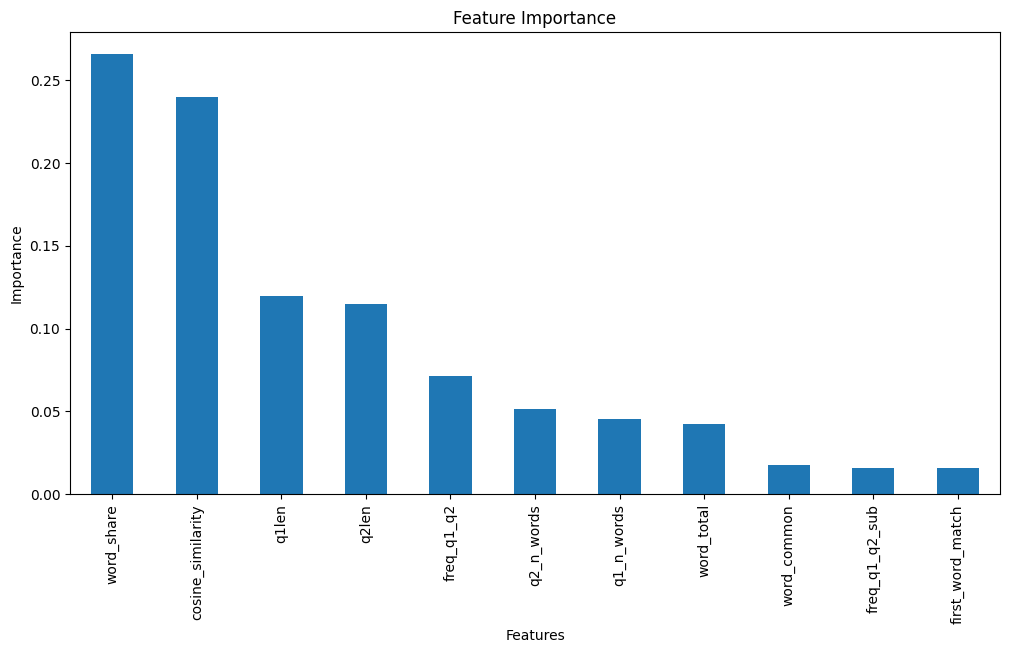

In [142]:
X_f=df_new_features.drop(['is_duplicate'],axis=1)
y_f=df_new_features['is_duplicate']
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_f, y_f)
import matplotlib.pyplot as plt

# Get feature importances
importances = clf.feature_importances_

# Create a Series with feature importances
feature_importances = pd.Series(importances, index=X_f.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

# questions=list(df_questions_upd['question1'])+list(df_questions_upd['question2'])
questions=list(df_train2['question1'])+list(df_train2['question2'])

cv=CountVectorizer(max_features=2)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [144]:
temp_df1=pd.DataFrame(q1_arr,index=df_questions_upd.index)
temp_df2=pd.DataFrame(q2_arr,index=df_questions_upd.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 4)

In [145]:
df_new_features.columns

Index(['is_duplicate', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'first_word_match', 'word_total', 'word_share',
       'freq_q1_q2', 'freq_q1_q2_sub', 'cosine_similarity'],
      dtype='object')

In [146]:
df_new=pd.concat([df_new_features,temp_df],axis=1)
df_new.head()

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370             1     54     43          10           8          6.0   
76524              0     80     31          14           5          0.0   
236661             0     38     24           7           4          0.0   
160378             0     64     48           9           6          5.0   
272094             1    137     88          22          14         12.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   

        cosine_similarity  0  1  0  1  
242370           0.606924  0  0  0  0  
76524            0.000000  0  1  0  0  
236661           0.361005  0  0  0  0  
160378           0.754521  1  1  1  1  
272094           0.673902  3  1  2  1

In [147]:
df_new

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370             1     54     43          10           8          6.0   
76524              0     80     31          14           5          0.0   
236661             0     38     24           7           4          0.0   
160378             0     64     48           9           6          5.0   
272094             1    137     88          22          14         12.0   
...              ...    ...    ...         ...         ...          ...   
236325             1     53     31          11           8          5.0   
155502             1     51     55          10          10          3.0   
225755             1     67     70          11          12         10.0   
118746             1     28     22           6           4          2.0   
224025             0     97    160          15          30          6.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   
...                  ...         ...         ...         ...             ...   
236325                 1        18.0    0.277778           2               0   
155502                 0        20.0    0.150000           3               1   
225755                 0        21.0    0.476190           2               0   
118746                 1        10.0    0.200000           9               3   
224025                 1        25.0    0.240000           2               0   

        cosine_similarity  0  1  0  1  
242370           0.606924  0  0  0  0  
76524            0.000000  0  1  0  0  
236661           0.361005  0  0  0  0  
160378           0.754521  1  1  1  1  
272094           0.673902  3  1  2  1  
...                   ... .. .. .. ..  
236325           0.870442  1  0  0  0  
155502           0.468618  0  1  0  0  
225755           0.980184  0  0  0  0  
118746           0.377546  0  0  0  0  
224025           0.325712  2  1  3  3  

[50000 rows x 16 columns]

In [148]:
from sklearn.model_selection import train_test_split
# df_new=df_new.drop(['freq_q1_q2_sub'],axis=1)
df_new=df_new.drop(['q1len','q2len', 'word_total', 'word_common','freq_q1_q2_sub'],axis=1)
X=df_new.iloc[:,1:].values
y=df_new.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=420)

In [149]:
df_new

is_duplicate  q1_n_words  q2_n_words  first_word_match  word_share  \
242370             1          10           8                 1    0.333333   
76524              0          14           5                 0    0.000000   
236661             0           7           4                 0    0.000000   
160378             0           9           6                 1    0.333333   
272094             1          22          14                 1    0.363636   
...              ...         ...         ...               ...         ...   
236325             1          11           8                 1    0.277778   
155502             1          10          10                 0    0.150000   
225755             1          11          12                 0    0.476190   
118746             1           6           4                 1    0.200000   
224025             0          15          30                 1    0.240000   

        freq_q1_q2  cosine_similarity  0  1  0  1  
242370           3           0.606924  0  0  0  0  
76524            2           0.000000  0  1  0  0  
236661           3           0.361005  0  0  0  0  
160378           2           0.754521  1  1  1  1  
272094           9           0.673902  3  1  2  1  
...            ...                ... .. .. .. ..  
236325           2           0.870442  1  0  0  0  
155502           3           0.468618  0  1  0  0  
225755           2           0.980184  0  0  0  0  
118746           9           0.377546  0  0  0  0  
224025           2           0.325712  2  1  3  3  

[50000 rows x 11 columns]

In [150]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_featured=RandomForestClassifier()
rf_featured.fit(X_train,y_train)
y_pred=rf_featured.predict(X_test)
accuracy_score(y_test,y_pred)

0.7616

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4989, 1343],
       [1041, 2627]])

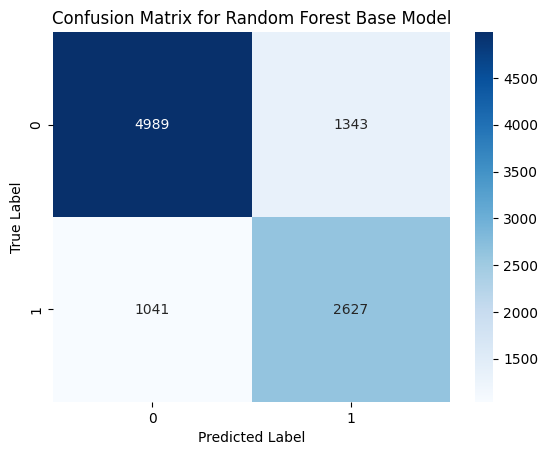

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix visualization.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Base Model")
plt.show()


In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6332
           1       0.66      0.72      0.69      3668

    accuracy                           0.76     10000
   macro avg       0.74      0.75      0.75     10000
weighted avg       0.77      0.76      0.76     10000



In [155]:
#path_1 = path + 'RF_model.joblib'
#path_1

In [156]:
# !pip install joblib
#from joblib import dump, load
#from google.colab import files

#path_1 = path + 'RF_model.joblib'
#dump(rf_featured, 'RF_model.joblib')
#files.download('RF_model.joblib')
#dump(rf_featured, path_1)

#load(path_1)

## EDA With New Features

In [157]:
df_new_features.describe()

is_duplicate         q1len        q2len    q1_n_words    q2_n_words  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean       0.368980     59.430340     59.98474     10.912060     11.163780   
std        0.482533     29.813066     33.77903      5.394307      6.303256   
min        0.000000      2.000000      0.00000      1.000000      1.000000   
25%        0.000000     39.000000     39.00000      7.000000      7.000000   
50%        0.000000     52.000000     51.00000     10.000000      9.000000   
75%        1.000000     72.000000     71.00000     13.000000     13.000000   
max        1.000000    345.000000   1151.00000     73.000000    237.000000   

        word_common  first_word_match    word_total    word_share  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       4.498240          0.491820     21.085360      0.223330   
std        3.071271          0.499938      8.562213      0.127905   
min        0.000000          0.000000      5.000000      0.000000   
25%        2.000000          0.000000     15.000000      0.125000   
50%        4.000000          0.000000     19.000000      0.217391   
75%        6.000000          1.000000     25.000000      0.318182   
max       30.000000          1.000000    155.000000      0.500000   

         freq_q1_q2  freq_q1_q2_sub  cosine_similarity  
count  50000.000000    50000.000000       50000.000000  
mean       2.471680        0.310400           0.547995  
std        1.253295        0.826841           0.261299  
min        2.000000        0.000000           0.000000  
25%        2.000000        0.000000           0.374447  
50%        2.000000        0.000000           0.564024  
75%        2.000000        0.000000           0.760779  
max       19.000000       12.000000           1.000000

<ipython-input-158-98de202c97bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features['q1len'])


minimum characters 2
maximum characters 345
average num of characters 59


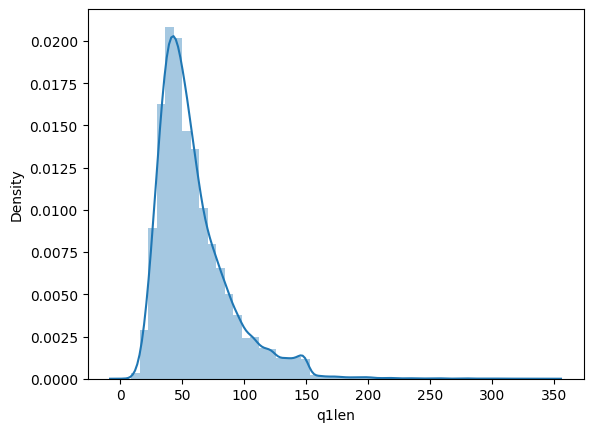

In [158]:
sns.distplot(df_new_features['q1len'])
print('minimum characters',df_new_features['q1len'].min())
print('maximum characters',df_new_features['q1len'].max())
print('average num of characters',int(df_new_features['q1len'].mean()))

<ipython-input-159-cea33e53549c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features['q2len'])


minimum characters 0
maximum characters 1151
average num of characters 59


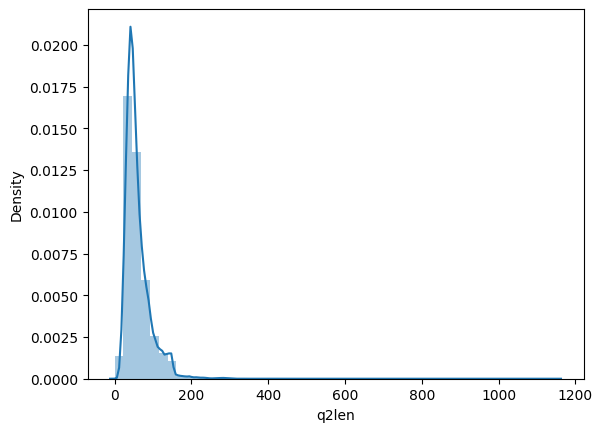

In [159]:
sns.distplot(df_new_features['q2len'])
print('minimum characters',df_new_features['q2len'].min())
print('maximum characters',df_new_features['q2len'].max())
print('average num of characters',int(df_new_features['q2len'].mean()))

<ipython-input-160-27ce848359ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['q1_n_words'])


minimum words 1
maximum words 73
average num of words 10


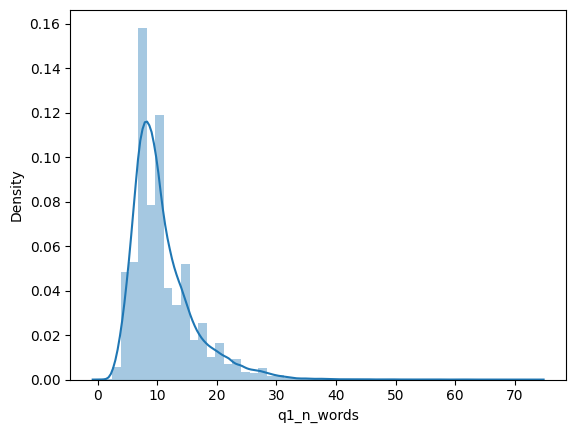

In [160]:
sns.distplot(df_new['q1_n_words'])
print('minimum words',df_new['q1_n_words'].min())
print('maximum words',df_new['q1_n_words'].max())
print('average num of words',int(df_new['q1_n_words'].mean()))

<ipython-input-161-bdfb054501ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['q2_n_words'])


minimum words 1
maximum words 237
average num of words 11


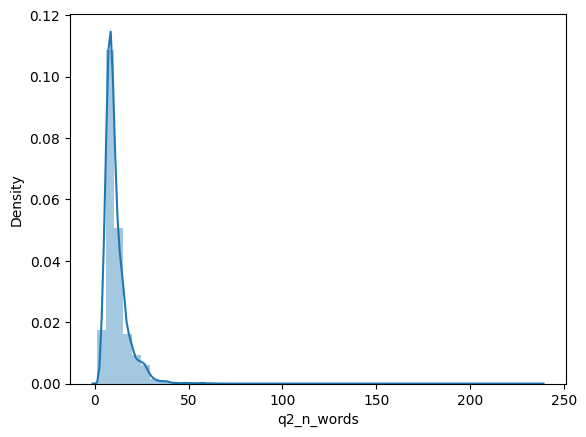

In [161]:
sns.distplot(df_new['q2_n_words'])
print('minimum words',df_new['q2_n_words'].min())
print('maximum words',df_new['q2_n_words'].max())
print('average num of words',int(df_new['q2_n_words'].mean()))

<ipython-input-162-dec6c5f4f4c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_common'],label='non duplicate')
<ipython-input-162-dec6c5f4f4c9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplic

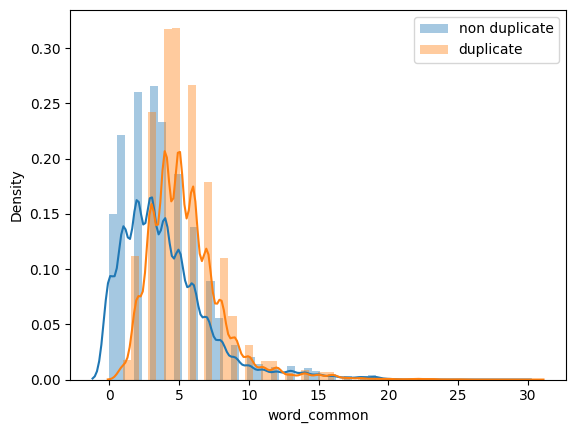

In [162]:
# for deck show
sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(df_new_features[df_new_features['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-163-54bb939fb56c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_total'],label='non duplicate')
<ipython-input-163-54bb939fb56c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplica

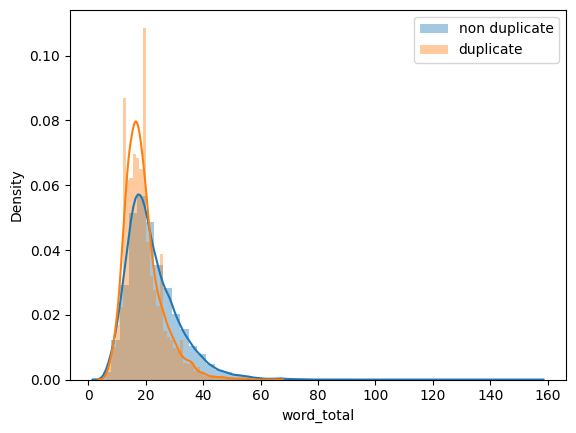

In [163]:
# for deck show
sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(df_new_features[df_new_features['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-164-f60d70e56b8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_share'],label='non duplicate')
<ipython-input-164-f60d70e56b8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new_features[df_new_features['is_duplica

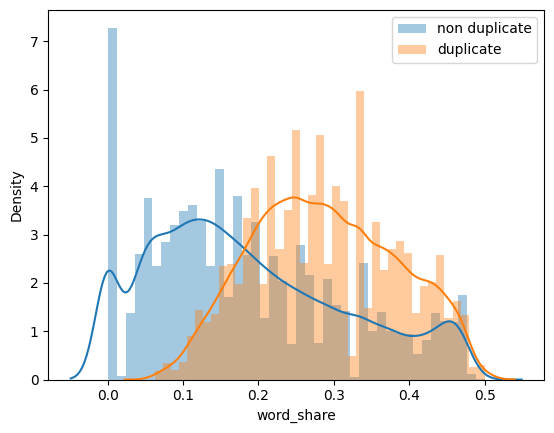

In [164]:
# for deck
sns.distplot(df_new_features[df_new_features['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(df_new_features[df_new_features['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

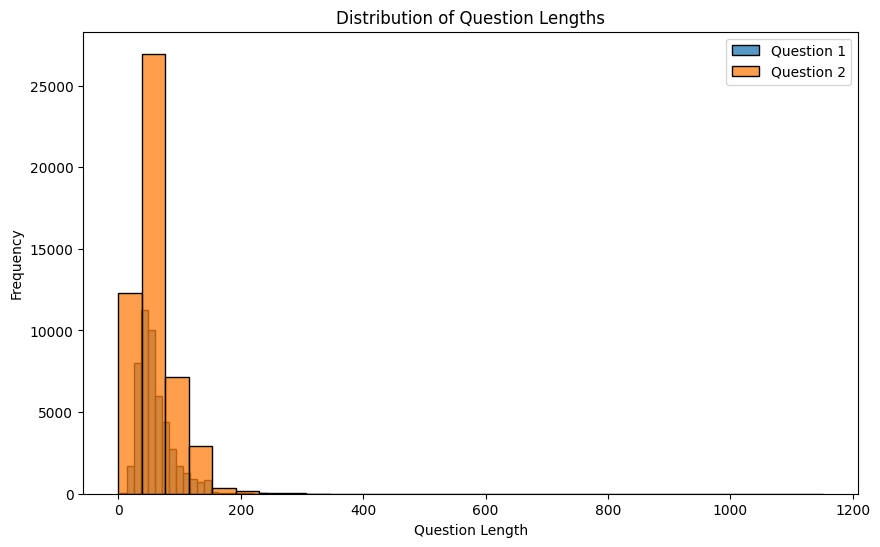

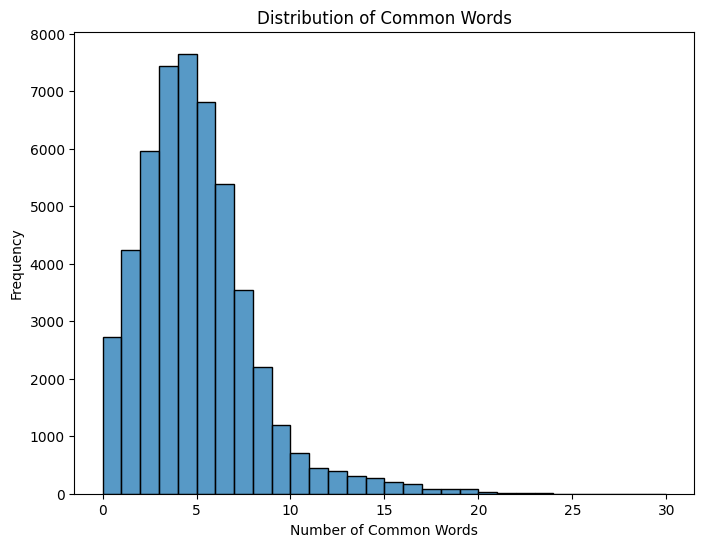

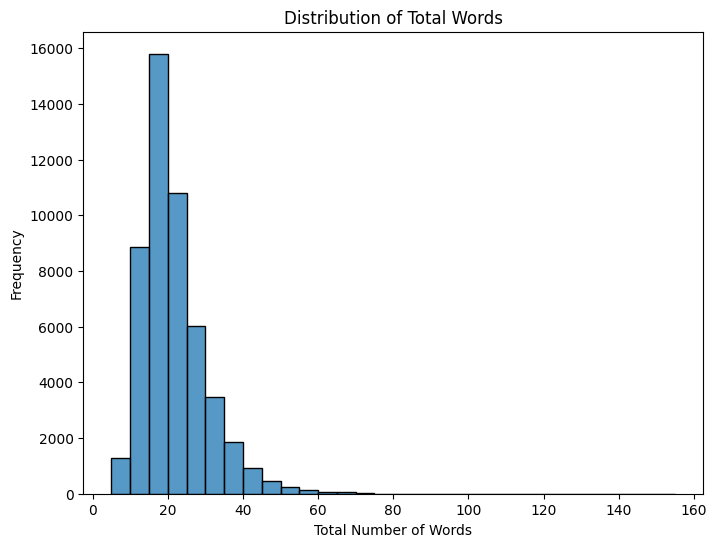

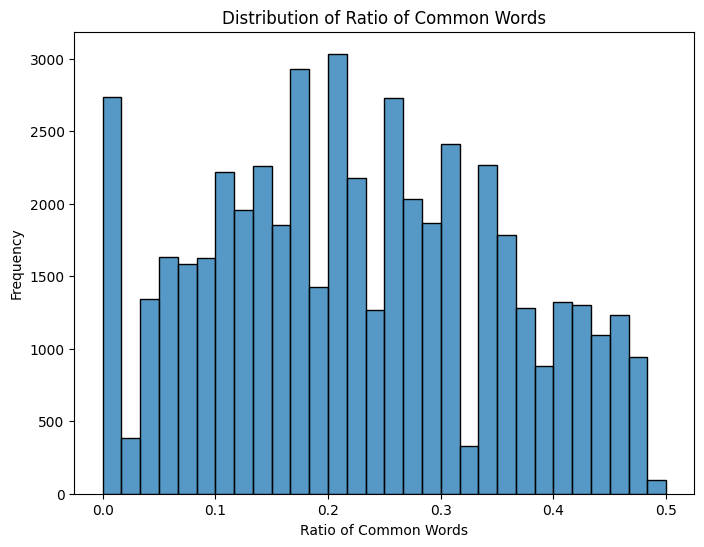

In [165]:
import matplotlib.pyplot as plt
# Distribution of q1_len and q2_len
plt.figure(figsize=(10, 6))
sns.histplot(df_new_features['q1len'], bins=30, label='Question 1')
sns.histplot(df_new_features['q2len'], bins=30, label='Question 2')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')
plt.legend()
plt.show()

# Distribution of word_common
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['word_common'], bins=30)
plt.xlabel('Number of Common Words')
plt.ylabel('Frequency')
plt.title('Distribution of Common Words')
plt.show()

# Distribution of word_total
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['word_total'], bins=30)
plt.xlabel('Total Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Total Words')
plt.show()

# Distribution of word_share
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['word_share'], bins=30)
plt.xlabel('Ratio of Common Words')
plt.ylabel('Frequency')
plt.title('Distribution of Ratio of Common Words')
plt.show()


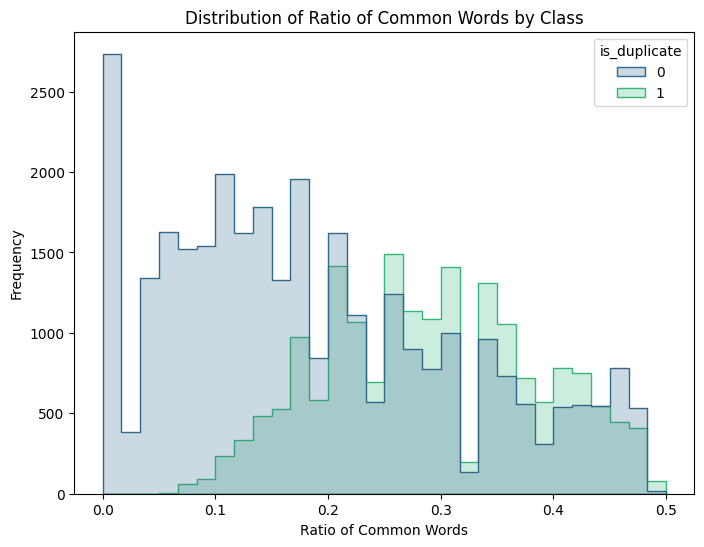

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df_new, x='word_share', bins=30, hue='is_duplicate', palette='viridis', element='step')
plt.xlabel('Ratio of Common Words')
plt.ylabel('Frequency')
plt.title('Distribution of Ratio of Common Words by Class')
plt.show()

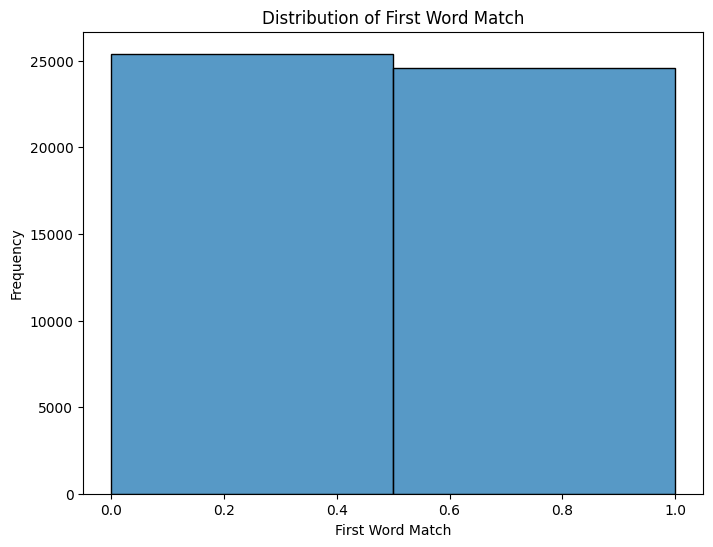

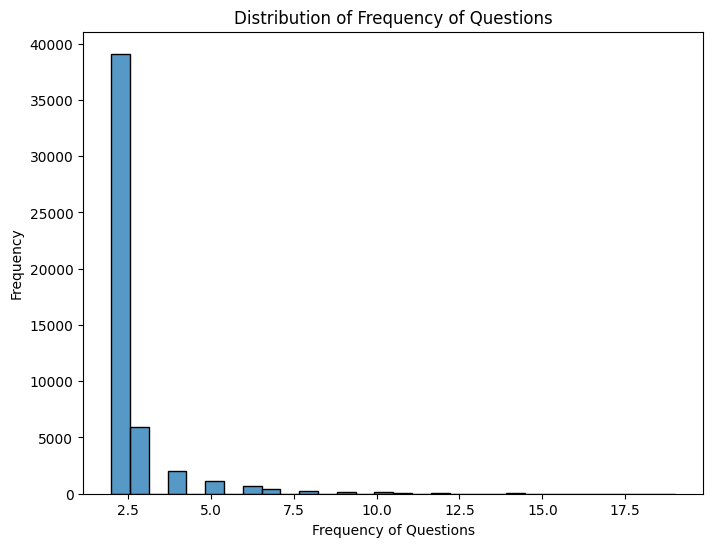

In [167]:
import matplotlib.pyplot as plt
# Distribution of first_word_match
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['first_word_match'],bins=2)
plt.xlabel('First Word Match')
plt.ylabel('Frequency')
plt.title('Distribution of First Word Match')
plt.show()

# Distribution of freq_q1_q2
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['freq_q1_q2'], bins=30)
plt.xlabel('Frequency of Questions')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency of Questions')
plt.show()


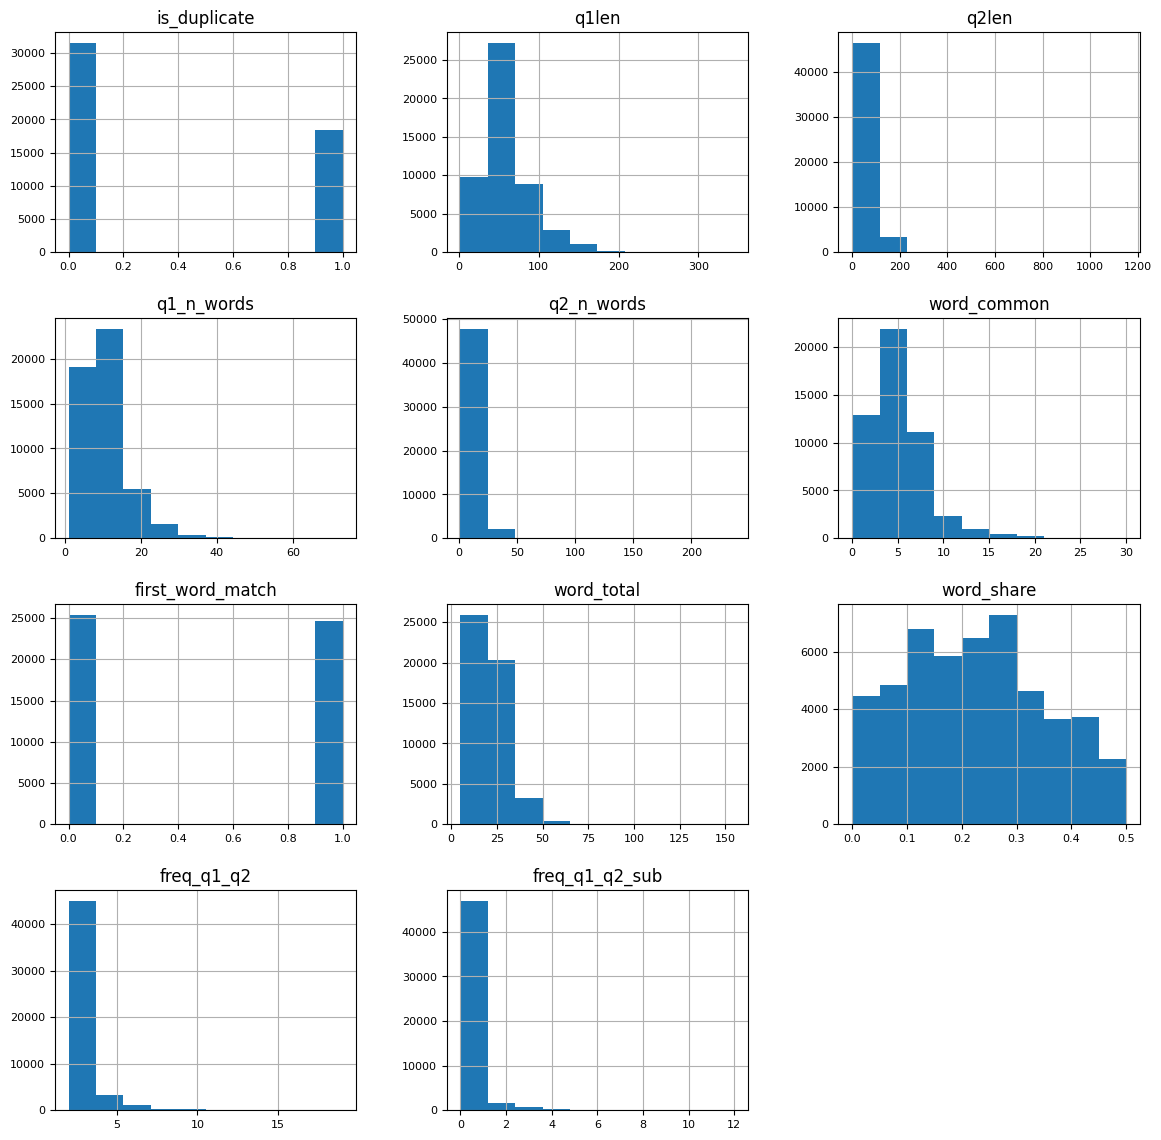

In [168]:
import matplotlib.pyplot as plt
# Distribution of first 14 columns
df_new_features.iloc[:, :11].hist(figsize=(14, 14), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

In [169]:
df_new_features

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
242370             1     54     43          10           8          6.0   
76524              0     80     31          14           5          0.0   
236661             0     38     24           7           4          0.0   
160378             0     64     48           9           6          5.0   
272094             1    137     88          22          14         12.0   
...              ...    ...    ...         ...         ...          ...   
236325             1     53     31          11           8          5.0   
155502             1     51     55          10          10          3.0   
225755             1     67     70          11          12         10.0   
118746             1     28     22           6           4          2.0   
224025             0     97    160          15          30          6.0   

        first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
242370                 1        18.0    0.333333           3               1   
76524                  0        18.0    0.000000           2               0   
236661                 0        11.0    0.000000           3               1   
160378                 1        15.0    0.333333           2               0   
272094                 1        33.0    0.363636           9               1   
...                  ...         ...         ...         ...             ...   
236325                 1        18.0    0.277778           2               0   
155502                 0        20.0    0.150000           3               1   
225755                 0        21.0    0.476190           2               0   
118746                 1        10.0    0.200000           9               3   
224025                 1        25.0    0.240000           2               0   

        cosine_similarity  
242370           0.606924  
76524            0.000000  
236661           0.361005  
160378           0.754521  
272094           0.673902  
...                   ...  
236325           0.870442  
155502           0.468618  
225755           0.980184  
118746           0.377546  
224025           0.325712  

[50000 rows x 12 columns]

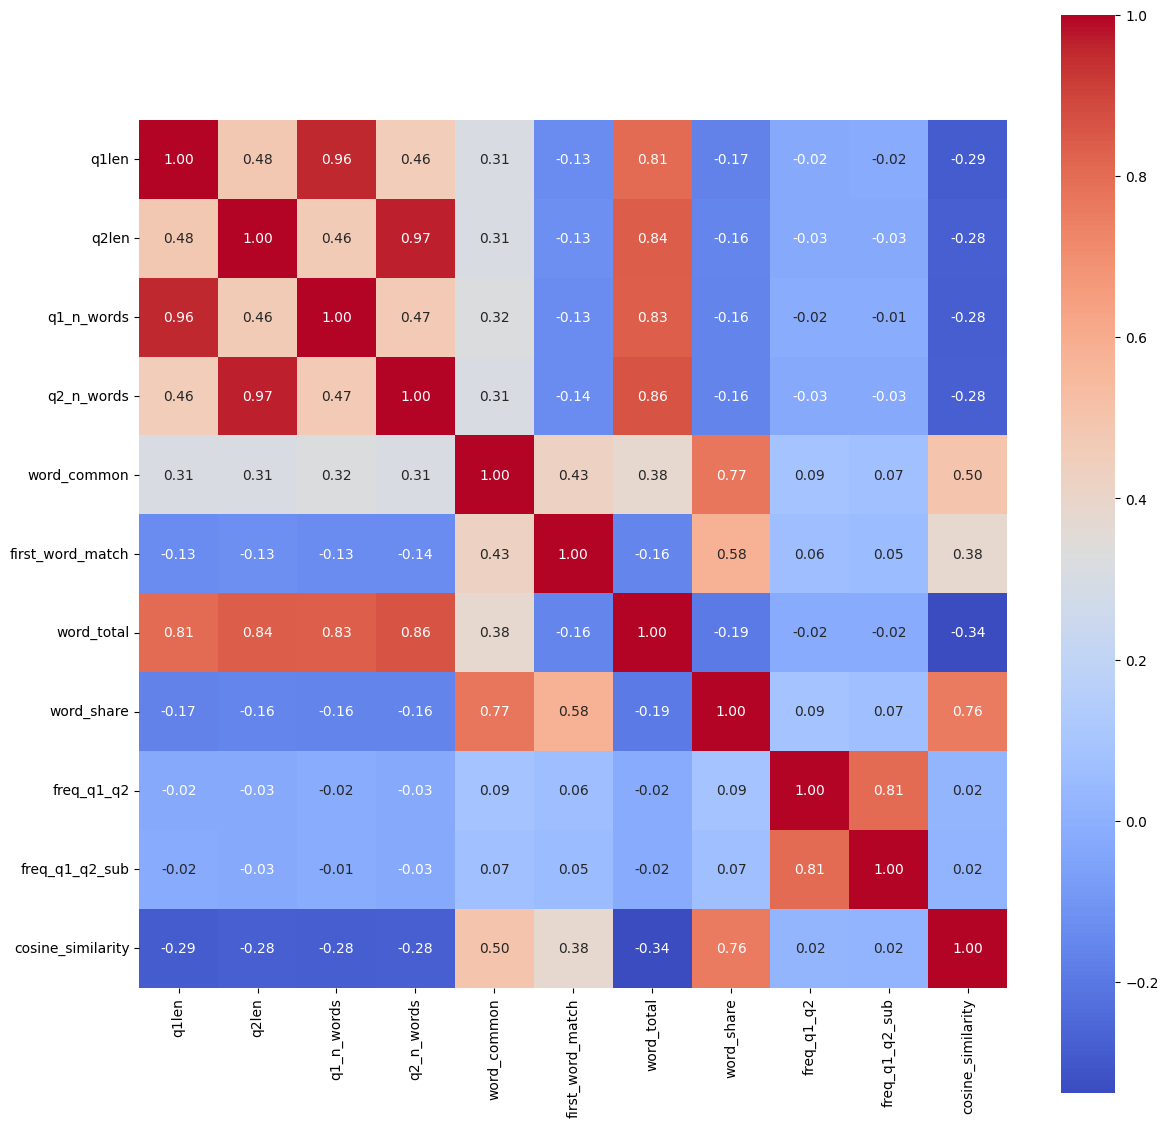

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the first 14 columns of df_new
df_new_14 = df_new_features.iloc[:, 1:14]

# Calculate the correlation matrix
corr_matrix = df_new_14.corr()

# Generate a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)

# Show the heatmap
plt.show()


In [171]:
df_new

is_duplicate  q1_n_words  q2_n_words  first_word_match  word_share  \
242370             1          10           8                 1    0.333333   
76524              0          14           5                 0    0.000000   
236661             0           7           4                 0    0.000000   
160378             0           9           6                 1    0.333333   
272094             1          22          14                 1    0.363636   
...              ...         ...         ...               ...         ...   
236325             1          11           8                 1    0.277778   
155502             1          10          10                 0    0.150000   
225755             1          11          12                 0    0.476190   
118746             1           6           4                 1    0.200000   
224025             0          15          30                 1    0.240000   

        freq_q1_q2  cosine_similarity  0  1  0  1  
242370           3           0.606924  0  0  0  0  
76524            2           0.000000  0  1  0  0  
236661           3           0.361005  0  0  0  0  
160378           2           0.754521  1  1  1  1  
272094           9           0.673902  3  1  2  1  
...            ...                ... .. .. .. ..  
236325           2           0.870442  1  0  0  0  
155502           3           0.468618  0  1  0  0  
225755           2           0.980184  0  0  0  0  
118746           9           0.377546  0  0  0  0  
224025           2           0.325712  2  1  3  3  

[50000 rows x 11 columns]

In [172]:
# # Get the first 14 columns of df_new
# df_new_14 = df_new.iloc[:, :14]
# # Create a pair plot
# sns.pairplot(df_new_14)
# # Show the plot
# plt.show()

# REAL WORLD TEST SET

In [31]:
df_test = pd.read_csv(path+'real_test.csv')
df_test.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  
0  Does higher income level mean higher education...           0.0  
1      Are Indians the largest minority in the GTA?            0.0  
2                   Will humans be taken over by AI?           1.0  
3  Was the gun first legalized by the United Stat...           1.0  
4  Is Pacific Ocean the deepest of the world ocea...           0.0

In [32]:
df_test.dropna(inplace=True)

In [33]:
df_test=df_test.fillna('')

In [34]:
df_test1=df_test.copy()
df_test1

id  qid1  qid2                                          question1  \
0    1     1     1    Does higher education level mean higher income?   
1    2     1     1                  How many Indians live in the GTA?   
2    3     1     1                            Will AI replace humans?   
3    4     1     1    Was U.S. the first country to legalize the gun?   
4    5     2     2  Is Pacific Ocean the largest of the world ocea...   
5    6     2     2                    What is the population of India   
6    7     2     2                 Are we going to clear this course?   
7    8     2     2   Will I finish these assignments before deadline?   
8    7     3     3          Is canadian economy going down the drain?   
9    8     3     3  Does having a masters degree show you're intel...   
10   9     3     3  Can a student rely on the QS ratings while sel...   
11  10     3     3               what came first an egg or a chicken?   
12  11     4     4  Are children scared of dark and prefer not to ...   
13  12     4     4              What is the impact of global warming?   
14  13     4     4               What is the salary range after MMA?    
15  14     4     4                Why should people take ashwagandha?   
16  15     5     5                      Is life meant to be difficult   
17  16     5     5  Are there students in University of Toronto fr...   
18  17     5     5  Does childhood trauma reflect in your current ...   
19  18     5     5    Why I need to sleep for over 8 hours every day?   
21  20     7     7   Is Donald Trump going to return as US President    
22  21     8     8  Is Justin Trudeau and Justin Ashford the same ...   
23  22     9     9               Why do people need to go to college?   
24  23    10    10                       Does cursing relieve stress?   
25  24    11    11                      How to tell a person is smart   
26  25    12    12  What are effective methods to enhance sleep qu...   
27  26    13    13                 How can I maintain a healthy diet?   
28  27    14    14                Will Luffy ever find the One Piece?   
29  28    15    15  How did Phil Dunphy's character develop in Mod...   
30  29    16    16  Does owning a dog help reduce anxiety and depr...   
31  30    17    17  How does Zoro's behaviour throughout the One P...   
32  31    18    18              Could you explain this concept to me?   
33  32    19    19    Which one is more important? Freedom or Justice   
34  33    20    20                         Is kpop popular in Canada?   
35  34    21    21                      Can Tiffany pass the program?   
36  35    22    22       how many years have you lived in this world?   
37  36    23    23                   Is learning a new language hard?   
38  37    24    24         Why do you run away from problems in life?   
39  38    25    25                           Do you like soccer game?   
40  39    26    26                      Will we get a job after MMA ?   
41  40    27    27                           Is the practicum useful?   
42  41    28    28  Does Ontario Health help in building skills fo...   
43  42    29    29  Which country is better to live? United States...   
44  43    30    30                   Is this an appropriate question?   

                                            question2  is_duplicate  
0   Does higher income level mean higher education...           0.0  
1       Are Indians the largest minority in the GTA?            0.0  
2                    Will humans be taken over by AI?           1.0  
3   Was the gun first legalized by the United Stat...           1.0  
4   Is Pacific Ocean the deepest of the world ocea...           0.0  
5   Is India the contry with the most population o...           0.0  
6              Is this course going to screw us over?           1.0  
7         When can I finish all of these assignements           1.0  
8   Has Canada been the most impacted country by r...           0.0  
9   What is the im

In [177]:
df_test1['q1len']=df_test1['question1'].str.len()
df_test1['q2len']=df_test1['question2'].str.len()
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  
0     53  
1     45  
2     32  
3     60  
4     54

In [178]:
df_test1['q1_n_words']=df_test1['question1'].apply(lambda row: len(row.split(" ")))
df_test1['q2_n_words']=df_test1['question2'].apply(lambda row: len(row.split(" ")))
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  
0     53           7           8  
1     45           7           9  
2     32           4           7  
3     60           9          11  
4     54          10          10

In [179]:
df_test1['word_common'] = df_test1.apply(normalized_word_Common, axis=1)
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  
0     53           7           8          5.0  
1     45           7           9          4.0  
2     32           4           7          1.0  
3     60           9          11          3.0  
4     54          10          10          7.0

In [180]:
lst_q1=df_test1['question1'].apply(lambda row: row.split(" ")).to_list()
lst_q2=df_test1['question2'].apply(lambda row: row.split(" ")).to_list()

In [181]:
lst_first_word=[]
for i in range(0, df_test1.shape[0]):
  if lst_q1[i][0] == lst_q2[i][0]:
    lst_first_word.append(1)
  else:
    lst_first_word.append(0)
lst_first_word[:5]

[1, 0, 1, 1, 1]

In [182]:
df_test1['first_word_match'] = lst_first_word
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  first_word_match  
0     53           7           8          5.0                 1  
1     45           7           9          4.0                 0  
2     32           4           7          1.0                 1  
3     60           9          11          3.0                 1  
4     54          10          10          7.0                 1

In [183]:
df_test1['word_total'] = df_test1.apply(normalized_word_Total, axis=1)
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  first_word_match  word_total  
0     53           7           8          5.0                 1        13.0  
1     45           7           9          4.0                 0        15.0  
2     32           4           7          1.0                 1        11.0  
3     60           9          11          3.0                 1        18.0  
4     54          10          10          7.0                 1        16.0

In [184]:
df_test1['word_share'] = df_test1.apply(normalized_word_share, axis=1)
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  first_word_match  word_total  \
0     53           7           8          5.0                 1        13.0   
1     45           7           9          4.0                 0        15.0   
2     32           4           7          1.0                 1        11.0   
3     60           9          11          3.0                 1        18.0   
4     54          10          10          7.0                 1        16.0   

   word_share  
0    0.384615  
1    0.266667  
2    0.090909  
3    0.166667  
4    0.437500

In [185]:
df_test1['freq_qid1'] = df_test1.groupby('qid1')['qid1'].transform('count')
df_test1['freq_qid2'] = df_test1.groupby('qid2')['qid2'].transform('count')
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  first_word_match  word_total  \
0     53           7           8          5.0                 1        13.0   
1     45           7           9          4.0                 0        15.0   
2     32           4           7          1.0                 1        11.0   
3     60           9          11          3.0                 1        18.0   
4     54          10          10          7.0                 1        16.0   

   word_share  freq_qid1  freq_qid2  
0    0.384615          4          4  
1    0.266667          4          4  
2    0.090909          4          4  
3    0.166667          4          4  
4    0.437500          4          4

In [186]:
df_test1['freq_q1_q2']=df_test1['freq_qid1']+df_test1['freq_qid2']
df_test1['freq_q1_q2_sub']=abs(df_test1['freq_qid1']-df_test1['freq_qid2'])
df_test1.drop(['freq_qid1','freq_qid2'],axis=1,inplace=True)
df_test1.head()

id  qid1  qid2                                          question1  \
0   1     1     1    Does higher education level mean higher income?   
1   2     1     1                  How many Indians live in the GTA?   
2   3     1     1                            Will AI replace humans?   
3   4     1     1    Was U.S. the first country to legalize the gun?   
4   5     2     2  Is Pacific Ocean the largest of the world ocea...   

                                           question2  is_duplicate  q1len  \
0  Does higher income level mean higher education...           0.0     47   
1      Are Indians the largest minority in the GTA?            0.0     33   
2                   Will humans be taken over by AI?           1.0     23   
3  Was the gun first legalized by the United Stat...           1.0     47   
4  Is Pacific Ocean the deepest of the world ocea...           0.0     54   

   q2len  q1_n_words  q2_n_words  word_common  first_word_match  word_total  \
0     53           7           8          5.0                 1        13.0   
1     45           7           9          4.0                 0        15.0   
2     32           4           7          1.0                 1        11.0   
3     60           9          11          3.0                 1        18.0   
4     54          10          10          7.0                 1        16.0   

   word_share  freq_q1_q2  freq_q1_q2_sub  
0    0.384615           8               0  
1    0.266667           8               0  
2    0.090909           8               0  
3    0.166667           8               0  
4    0.437500           8               0

In [35]:
df_test1['question1'] = df_test1['question1'].apply(preprocess)
df_test1['question2'] = df_test1['question2'].apply(preprocess)


q1_vectors = vectorizer.transform(df_test1['question1'])
q2_vectors = vectorizer.transform(df_test1['question2'])

# Compute cosine similarity
cosine_similarities = [cosine_similarity(q1_vectors[i], q2_vectors[i])[0][0] for i in range(q1_vectors.shape[0])]

# Add the cosine similarities to the dataframe
df_test1['cosine_similarity'] = cosine_similarities
df_test1.head()

NameError: name 'vectorizer' is not defined

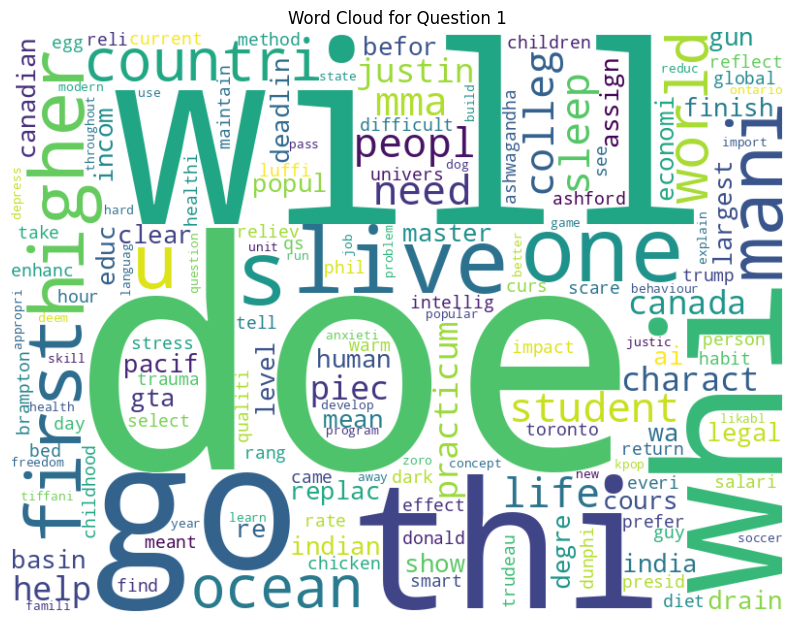

In [189]:
text_test1 = ' '.join(df_test1['question1'])
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text_test1)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Question 1')
plt.show()

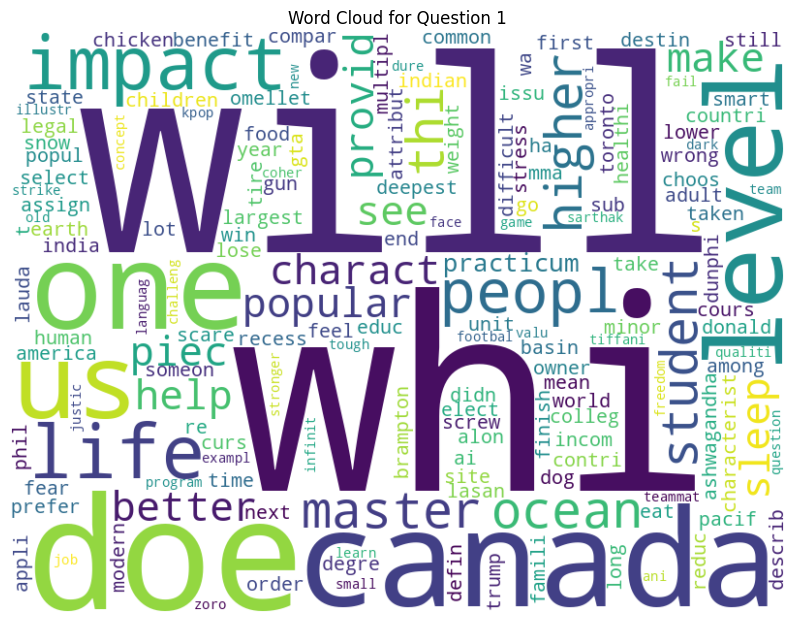

In [190]:
text_test2 = ' '.join(df_test1['question2'])
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text_test2)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Question 1')
plt.show()

In [39]:
df_questions_test=df_test1[['question1','question2']]
df_questions_test.head()

question1  \
0    higher educ level mean higher incom   
1                   mani indian live gta   
2                        ai replac human   
3              u first countri legal gun   
4  pacif ocean largest world ocean basin   

                                   question2  
0  higher incom level mean higher educ level  
1                   indian largest minor gta  
2                             human taken ai  
3         gun first legal unit state america  
4      pacif ocean deepest world ocean basin

In [192]:
df_new_features_test=df_test1.drop(['question1','question2','qid1','qid2','id'],axis=1)
df_new_features_test.head()

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
0           0.0     47     53           7           8          5.0   
1           0.0     33     45           7           9          4.0   
2           1.0     23     32           4           7          1.0   
3           1.0     47     60           9          11          3.0   
4           0.0     54     54          10          10          7.0   

   first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
0                 1        13.0    0.384615           8               0   
1                 0        15.0    0.266667           8               0   
2                 1        11.0    0.090909           8               0   
3                 1        18.0    0.166667           8               0   
4                 1        16.0    0.437500           8               0   

   cosine_similarity  
0           0.962358  
1           0.547533  
2           0.609912  
3           0.667454  
4           0.867078

In [37]:
# questions=list(df_questions_upd['question1'])+list(df_questions_upd['question2'])
questions=list(df_test1['question1'])+list(df_test1['question2'])
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [40]:
temp_df1=pd.DataFrame(q1_arr,index=df_questions_test.index)
temp_df2=pd.DataFrame(q2_arr,index=df_questions_test.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(44, 200)

In [195]:
df_new_test=pd.concat([df_new_features_test,temp_df],axis=1)
df_new_test.head()

is_duplicate  q1len  q2len  q1_n_words  q2_n_words  word_common  \
0           0.0     47     53           7           8          5.0   
1           0.0     33     45           7           9          4.0   
2           1.0     23     32           4           7          1.0   
3           1.0     47     60           9          11          3.0   
4           0.0     54     54          10          10          7.0   

   first_word_match  word_total  word_share  freq_q1_q2  freq_q1_q2_sub  \
0                 1        13.0    0.384615           8               0   
1                 0        15.0    0.266667           8               0   
2                 1        11.0    0.090909           8               0   
3                 1        18.0    0.166667           8               0   
4                 1        16.0    0.437500           8               0   

   cosine_similarity  0  1  0  1  
0           0.962358  0  0  0  0  
1           0.547533  0  1  0  2  
2           0.609912  0  0  0  0  
3           0.667454  0  2  0  2  
4           0.867078  1  2  1  2

In [196]:
df_new_test=df_new_test.drop(['q1len','q2len', 'word_total', 'word_common','freq_q1_q2_sub'],axis=1)
df_new_test

is_duplicate  q1_n_words  q2_n_words  first_word_match  word_share  \
0            0.0           7           8                 1    0.384615   
1            0.0           7           9                 0    0.266667   
2            1.0           4           7                 1    0.090909   
3            1.0           9          11                 1    0.166667   
4            0.0          10          10                 1    0.437500   
5            0.0           6          10                 0    0.266667   
6            1.0           7           8                 0    0.200000   
7            1.0           7           8                 0    0.200000   
8            0.0           7           9                 0    0.062500   
9            0.0           8          11                 0    0.105263   
10           0.0          12           9                 0    0.050000   
11           0.0           8           9                 1    0.176471   
12           0.0          13           7                 0    0.000000   
13           0.0           7          11                 0    0.000000   
14           0.0           8          11                 0    0.052632   
15           1.0           5           6                 0    0.090909   
16           1.0           6           5                 0    0.272727   
17           0.0           9           7                 0    0.125000   
18           0.0           8          13                 0    0.047619   
19           0.0          11          12                 1    0.173913   
21           1.0          10           7                 0    0.117647   
22           0.0           9           9                 0    0.058824   
23           0.0           8           6                 1    0.307692   
24           0.0           4           6                 0    0.000000   
25           1.0           7           9                 0    0.062500   
26           1.0           8           5                 0    0.076923   
27           0.0           7           8                 0    0.066667   
28           0.0           7           6                 0    0.153846   
29           1.0           9          10                 0    0.210526   
30           0.0           9           8                 0    0.058824   
31           1.0          14          15                 0    0.111111   
32           0.0           7           9                 1    0.250000   
33           0.0           8           9                 1    0.352941   
34           1.0           5           6                 0    0.363636   
35           1.0           5           5                 0    0.300000   
36           1.0           9           4                 1    0.076923   
37           0.0           6          10                 0    0.250000   
38           0.0           9           5                 1    0.071429   
39           1.0           5           5                 1    0.400000   
40           0.0           8          10                 0    0.222222   
41           1.0           4           6                 0    0.200000   
42           0.0          10           9                 0    0.157895   
43           0.0          10           5                 0    0.200000   
44           0.0           5           6                 1    0.363636   

    freq_q1_q2  cosine_similarity  0  1  0  1  
0            8           0.962358  0  0  0  0  
1            8           0.547533  0  1  0  2  
2            8           0.609912  0  0  0  0  
3            8           0.667454  0  2  0  2  
4            8           0.867078  1  2  1  2  
5            8           0.674936  1  1  1  2  
6            8           0.436965  0  0  1  0  
7            8           0.773510  0  0  0  0  
8            8           0.012272  1  1  0  1  
9            8           0.406688  0  0  1  1  
10           8           0.299647  0  1  0  0  
11           8           0.389913  0  0  0  0  
12           8           0.152962  0  1  1  0  
1

In [197]:
X_tested=df_new_test.iloc[:,1:].values
y_tested=df_new_test.iloc[:,0].values

In [198]:
y_pred_test=rf_featured.predict(X_tested)
accuracy_score(y_tested,y_pred_test)

0.5681818181818182

In [199]:
print(classification_report(y_tested,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        28
         1.0       0.41      0.44      0.42        16

    accuracy                           0.57        44
   macro avg       0.54      0.54      0.54        44
weighted avg       0.57      0.57      0.57        44



# Below will be removed

In [61]:
df_questions_test1 =df_test1[['question1','question2', 'is_duplicate']]
df_questions_test1.head()

question1  \
0    higher educ level mean higher incom   
1                   mani indian live gta   
2                        ai replac human   
3              u first countri legal gun   
4  pacif ocean largest world ocean basin   

                                   question2  is_duplicate  
0  higher incom level mean higher educ level           0.0  
1                   indian largest minor gta           0.0  
2                             human taken ai           1.0  
3         gun first legal unit state america           1.0  
4      pacif ocean deepest world ocean basin           0.0

In [62]:
df_new_test1=pd.concat([df_questions_test1,temp_df],axis=1)
df_new_test1.head()

question1  \
0    higher educ level mean higher incom   
1                   mani indian live gta   
2                        ai replac human   
3              u first countri legal gun   
4  pacif ocean largest world ocean basin   

                                   question2  is_duplicate  0  1  2  3  4  5  \
0  higher incom level mean higher educ level           0.0  0  0  0  0  0  0   
1                   indian largest minor gta           0.0  0  0  0  0  0  0   
2                             human taken ai           1.0  1  0  0  0  0  0   
3         gun first legal unit state america           1.0  0  0  0  0  0  0   
4      pacif ocean deepest world ocean basin           0.0  0  0  0  0  1  0   

   6  ...  90  91  92  93  94  95  96  97  98  99  
0  0  ...   0   0   0   0   0   0   0   0   0   0  
1  0  ...   0   0   0   0   0   0   0   0   0   0  
2  0  ...   0   0   0   0   0   0   0   0   0   0  
3  0  ...   0   0   0   0   0   1   0   0   0   0  
4  0  ...   0   0   0   0   0   0   0   1   0   0  

[5 rows x 203 columns]

In [70]:
X_tested

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [76]:
X_tested=df_new_test1.iloc[:,3:]
y_tested=df_new_test1.iloc[:,2]

In [77]:
y_pred_test=rf_base.predict(X_tested)
accuracy_score(y_tested,y_pred_test)

0.5227272727272727

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_tested,y_pred_test))


              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66        28
         1.0       0.27      0.19      0.22        16

    accuracy                           0.52        44
   macro avg       0.44      0.45      0.44        44
weighted avg       0.48      0.52      0.50        44

